0.9848484848484849


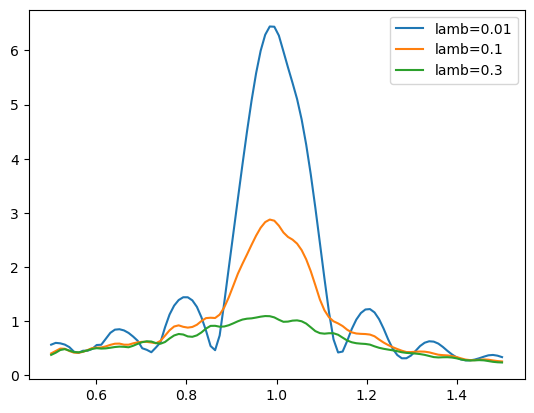

In [40]:


import numpy as np
import matplotlib.pyplot as plt
import project1.solver_ivp as solver


def f(x,v,arg,t):
    omega0=arg[0]
    lamb=arg[1]
    omegaf=arg[2]
    F0=arg[3]

    return [v,F0*np.cos(omegaf*t)-omega0**2*x-lamb*v]

#x,v,t=solve_ivp(f,[0,40], [1,0], "RK2", 0.1,(1.0,1.0,0.1))
A=0.01
omega0=1
lamb=0.01

F0=0.5
omegaa=np.linspace(0.5,1.5,int(1/0.01))
D=[np.zeros(len(omegaa)),np.zeros(len(omegaa)),np.zeros(len(omegaa))]
k=0
for lamb in [0.01,0.1,0.3]:
    i=0
    for omegaf in omegaa:
        omega1=np.sqrt(abs(omega0**2-0.25*lamb**2))
        x2,v2,t2=solver.solve_ivp(f,[0,50], [0,omega1*A],"RK4", 0.01,(omega0,lamb,omegaf,F0))
        tt=np.where(t2>40)
        D[k][i]=np.average(abs(x2[tt[0]]))
        i+=1
    k+=1
        
plt.plot(omegaa,D[0],label="lamb=0.01")
plt.plot(omegaa,D[1],label="lamb=0.1")
plt.plot(omegaa,D[2],label="lamb=0.3")
plt.legend()
print(omegaa[np.where(D[0]==max(D[0]))][0])



0.9888888888888889


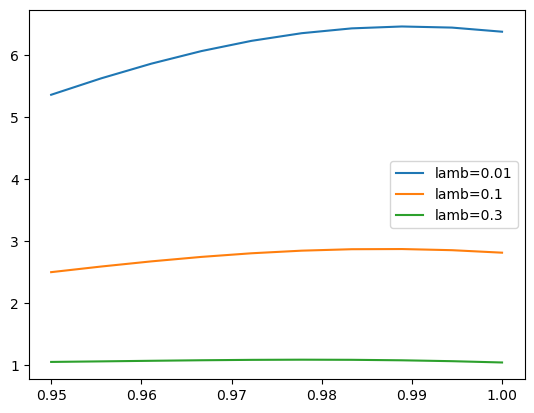

In [35]:


import numpy as np
import matplotlib.pyplot as plt
import project1.solver_ivp as solver


def f(x,v,arg,t):
    omega0=arg[0]
    lamb=arg[1]
    omegaf=arg[2]
    F0=arg[3]

    return [v,F0*np.cos(omegaf*t)-omega0**2*x-lamb*v]

#x,v,t=solve_ivp(f,[0,40], [1,0], "RK2", 0.1,(1.0,1.0,0.1))
A=0.01
omega0=1
lamb=0.01

F0=0.5
omegaa=np.linspace(0.95,1,10)
D=[np.zeros(len(omegaa)),np.zeros(len(omegaa)),np.zeros(len(omegaa))]
k=0
for lamb in [0.01,0.1,0.3]:
    i=0
    for omegaf in omegaa:
        omega1=np.sqrt(abs(omega0**2-4*lamb**2))
        x2,v2,t2=solver.solve_ivp(f,[0,50], [0,omega1*A],"RK4", 0.01,(omega0,lamb,omegaf,F0))
        tt=np.where(t2>40)
        D[k][i]=np.average(abs(x2[tt[0]]))
        i+=1
    k+=1
        
plt.plot(omegaa,D[0],label="lamb=0.01")
plt.plot(omegaa,D[1],label="lamb=0.1")
plt.plot(omegaa,D[2],label="lamb=0.3")
plt.legend()

print(omegaa[np.where(D[0]==max(D[0]))][0])



In [41]:
print(omegaa[np.where(D[0]==max(D[0]))][0],np.sqrt(abs(omega0**2-0.5*0.01**2)))
print(omegaa[np.where(D[1]==max(D[1]))][0],np.sqrt(abs(omega0**2-0.5*0.1**2)))
print(omegaa[np.where(D[2]==max(D[2]))][0],np.sqrt(abs(omega0**2-0.5*0.3**2)))

0.9848484848484849 0.9999749996874921
0.9848484848484849 0.9974968671630001
0.9747474747474748 0.9772410142846032


In [27]:
x=np.linspace(0,50,1000)
print(x[0:10])

[0.         0.05005005 0.1001001  0.15015015 0.2002002  0.25025025
 0.3003003  0.35035035 0.4004004  0.45045045]


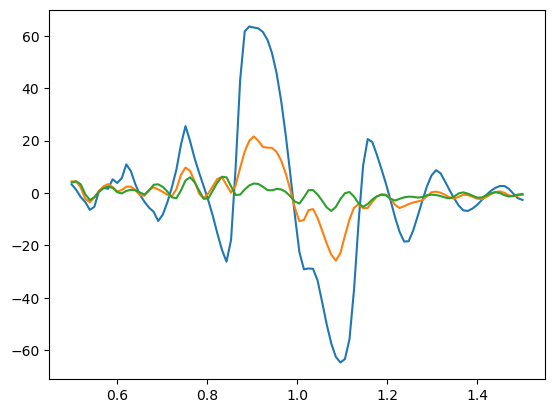

In [39]:
from scipy import gradient
dD=[[],[],[]]
dD[0]=np.gradient(D[0],omegaa)
dD[1]=np.gradient(D[1],omegaa)
dD[2]=np.gradient(D[2],omegaa)
plt.plot(omegaa,dD[0],label="lamb=0.01")
plt.plot(omegaa,dD[1],label="lamb=0.1")
plt.plot(omegaa,dD[2],label="lamb=0.3")